In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tomlkit
import summary

from pathlib import Path

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

[      0.      82226.644  164453.288  246679.932  328906.576  411133.22
  493359.864  575586.508  657813.152  740039.796  822266.44   904493.084
  986719.728 1068946.372 1151173.016 1233399.66  1315626.304 1397852.948
 1480079.592 1562306.236 1644532.88  1726759.524 1808986.168 1891212.812
 1973439.456 2055666.1   2137892.744 2220119.388 2302346.032 2384572.676
 2466799.32  2549025.964 2631252.608 2713479.252 2795705.896 2877932.54
 2960159.184 3042385.828 3124612.472 3206839.116 3289065.76  3371292.404
 3453519.048 3535745.692 3617972.336 3700198.98  3782425.624 3864652.268
 3946878.912 4029105.556 4111332.2   4193558.844] [0.00013999 0.00013999 0.00013999 0.00013999 0.00013998 0.00013998
 0.00013998 0.00013998 0.00013997 0.00013997 0.00013997 0.00013997
 0.00013996 0.00013996 0.00013996 0.00013996 0.00013995 0.00013995
 0.00013995 0.00013995 0.00013994 0.00013994 0.00013994 0.00013994
 0.00013993 0.00013993 0.00013993 0.00013992 0.00013992 0.00013992
 0.00013992 0.00013991 0.00013991

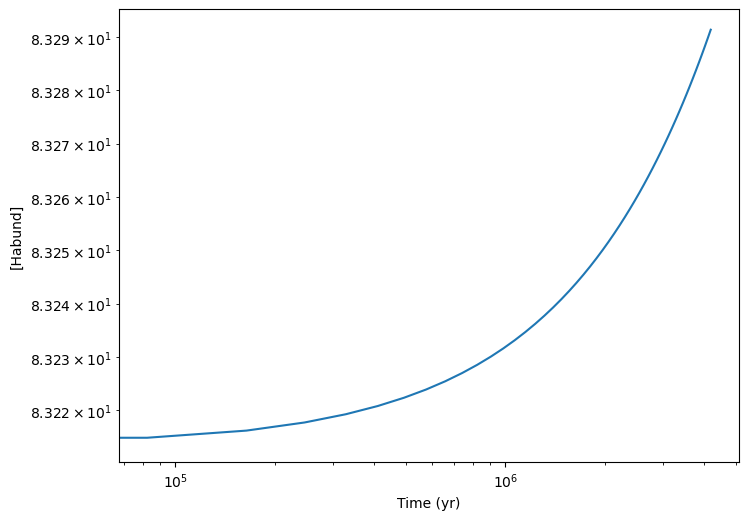

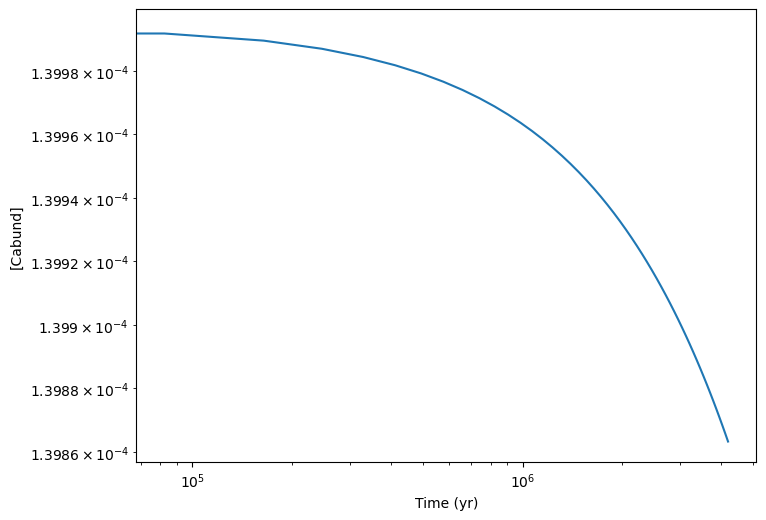

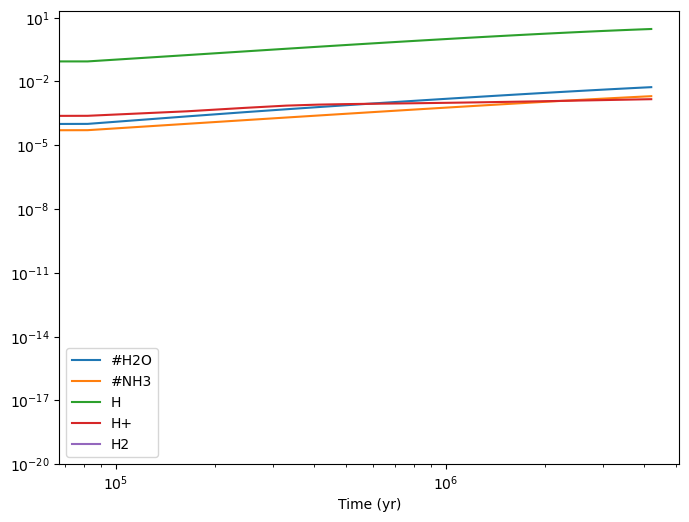

In [6]:
with open("naunet_config.toml") as config:
    content = tomlkit.loads(config.read())

species = summary.all_species
nspec = summary.nspec

bindata = np.fromfile(f'build/test/evolution_singlegrid.bin', dtype='float64').reshape(-1, nspec+1)
time = bindata[:, 0]


getidx = lambda x: species.index(x) + 1
Habund = np.sum([bindata[:, getidx(spec)] * natom for spec, natom in summary.H_dict.items()], axis=0)

fig, ax = plt.subplots()

ax.plot(time, Habund);

ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel('Time (yr)');
ax.set_ylabel(f'[Habund]');

getidx = lambda x: species.index(x) + 1
Cabund = np.sum([bindata[:, getidx(spec)] * natom for spec, natom in summary.C_dict.items()], axis=0)

print(time, Cabund / Habund)

fig, ax = plt.subplots()

ax.plot(time, Cabund/Habund);

ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel('Time (yr)');
ax.set_ylabel(f'[Cabund]');

fig, ax = plt.subplots()

for spec, natom in summary.H_dict.items():
    specHabund = natom * bindata[:, getidx(spec)]
    if specHabund.max() > 1e-3:
        ax.plot(time, specHabund, label=f"{spec}");

ax.legend();
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_ylim(1e-20, 20);
ax.set_xlabel('Time (yr)');
# ax.set_ylabel(f'[Habund]');